In [1]:
import os
import shutil
data = "Data"
data_dir = "Disease"
print(os.listdir(data))

['Corn_Blight', 'Corn_Common_Rust', 'Corn_Gray_Spot', 'Corn_Healthy', 'Rice_Brown_Spot', 'Rice_Healthy', 'Rice_Hispa', 'Rice_Leaf_Blast']


In [2]:
train_test = ("train","val", "test")
classes = ('Corn_Blight', 'Corn_Common_Rust', 'Corn_Gray_Spot', 'Corn_Healthy', 'Rice_Brown_Spot', 'Rice_Hispa', 
           'Rice_Leaf_Blast', 'Rice_Healthy', 'Cassava_Bacterial_Blight', 'Cassava_Brown_Streak', 
           'Cassava_Green_Mottle', 'Cassava_Mosaic', 'Cassava_Healthy')

for tt in train_test:
  path = os.path.join(data_dir,tt)
  if not os.path.exists(path):
    os.makedirs(path)
    for cls in classes:
      path_t = os.path.join(path,cls)
      if not os.path.exists(path_t):
        os.makedirs(path_t)

In [3]:
train_size = 0.7
val_size = 0.1
test_size = 0.2
train_dir = "Disease/train"
val_dir = "Disease/val"
test_dir = "Disease/test"

In [4]:
#Before we dive into visualization, check how many images for each class in train and test folder.
for tt in os.listdir(data_dir):
  for cls in classes:
    path = data_dir+"/"+tt+"/"+cls
    print(f"There are {len(os.listdir(path))} {cls} images in {tt} folder") 
  print("------------------------------------------------------------------")

There are 229 Corn_Blight images in test folder
There are 261 Corn_Common_Rust images in test folder
There are 114 Corn_Gray_Spot images in test folder
There are 232 Corn_Healthy images in test folder
There are 104 Rice_Brown_Spot images in test folder
There are 113 Rice_Hispa images in test folder
There are 156 Rice_Leaf_Blast images in test folder
There are 298 Rice_Healthy images in test folder
There are 218 Cassava_Bacterial_Blight images in test folder
There are 438 Cassava_Brown_Streak images in test folder
There are 477 Cassava_Green_Mottle images in test folder
There are 2631 Cassava_Mosaic images in test folder
There are 515 Cassava_Healthy images in test folder
------------------------------------------------------------------
There are 802 Corn_Blight images in train folder
There are 914 Corn_Common_Rust images in train folder
There are 402 Corn_Gray_Spot images in train folder
There are 814 Corn_Healthy images in train folder
There are 367 Rice_Brown_Spot images in train fo

In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torch
import PIL
import torchvision
from torch.utils.data import random_split
from torchvision.transforms import Resize
from torchvision.transforms import Compose
from torchvision.transforms import *
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [6]:
transform_dict_train = transforms.Compose([transforms.Resize((256,256)),
                                        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
                                        transforms.ColorJitter(hue=.05, saturation=.05),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.CenterCrop(size=221),
                                        transforms.ToTensor(), 
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])
                                                       ])
transform_dict_val = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.CenterCrop(size=221),
                                     transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])
                                                       ])
transform_dict_test = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.CenterCrop(size=221),
                                     transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])
                                                       ]
)

In [7]:
#train_dir = "Disease/train"
train_ds = ImageFolder(train_dir,transform=transform_dict_train)
val_ds = ImageFolder(val_dir,transform=transform_dict_val)
test_ds = ImageFolder(test_dir,transform=transform_dict_test)

In [8]:
img, label = train_ds[0]
print(img.shape,label)
img

torch.Size([3, 221, 221]) 0


tensor([[[-0.4739, -0.4739, -0.2856,  ...,  0.0227, -0.0629,  0.0741],
         [-0.1657, -0.2342, -0.1486,  ...,  0.8104,  0.6392,  1.0331],
         [-0.3369, -0.4739, -0.1657,  ...,  1.0159,  0.9474,  1.0673],
         ...,
         [-1.5014, -1.4158, -1.6213,  ...,  1.2385,  1.1872,  1.1872],
         [-1.2959, -1.3473, -1.3130,  ...,  1.5468,  1.5810,  1.6838],
         [-0.3541, -0.3712, -0.4054,  ...,  1.9064,  1.9578,  1.9235]],

        [[ 0.4328,  0.4328,  0.5553,  ...,  0.4153,  0.1527,  0.3452],
         [ 0.9580,  0.7829,  0.7829,  ...,  1.0630,  0.9755,  1.4832],
         [ 0.3102,  0.1352,  0.3452,  ...,  1.2031,  1.3606,  1.6408],
         ...,
         [-1.2654, -1.3354, -1.6506,  ...,  0.9230,  0.8880,  0.8880],
         [-1.3004, -1.4055, -1.4405,  ...,  1.2556,  1.3431,  1.4482],
         [-0.5301, -0.4951, -0.5301,  ...,  1.6408,  1.7108,  1.6583]],

        [[-0.6018, -0.4798, -0.2532,  ..., -0.1835, -0.1661, -0.2010],
         [ 0.1302,  0.1476,  0.0605,  ...,  0

In [9]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

20296
2895
5786


In [10]:
''''
 The list of classes is stored in the .classes property of the dataset. The numeric label for each element corresponds
 to index of element's label in the list of classes.
'''
print(train_ds.classes)
print(val_ds.classes)
print(test_ds.classes)

['Cassava_Bacterial_Blight', 'Cassava_Brown_Streak', 'Cassava_Green_Mottle', 'Cassava_Healthy', 'Cassava_Mosaic', 'Corn_Blight', 'Corn_Common_Rust', 'Corn_Gray_Spot', 'Corn_Healthy', 'Rice_Brown_Spot', 'Rice_Healthy', 'Rice_Hispa', 'Rice_Leaf_Blast']
['Cassava_Bacterial_Blight', 'Cassava_Brown_Streak', 'Cassava_Green_Mottle', 'Cassava_Healthy', 'Cassava_Mosaic', 'Corn_Blight', 'Corn_Common_Rust', 'Corn_Gray_Spot', 'Corn_Healthy', 'Rice_Brown_Spot', 'Rice_Healthy', 'Rice_Hispa', 'Rice_Leaf_Blast']
['Cassava_Bacterial_Blight', 'Cassava_Brown_Streak', 'Cassava_Green_Mottle', 'Cassava_Healthy', 'Cassava_Mosaic', 'Corn_Blight', 'Corn_Common_Rust', 'Corn_Gray_Spot', 'Corn_Healthy', 'Rice_Brown_Spot', 'Rice_Healthy', 'Rice_Hispa', 'Rice_Leaf_Blast']


In [11]:
# We can view the image using matplotlib, however we need to to change the tensor dimensions to (100,585,3).
import matplotlib.pyplot as plt

def show_example(img,label):
  print("Label", train_ds.classes[label], "-" + str(label))
  plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Bacterial_Blight -0


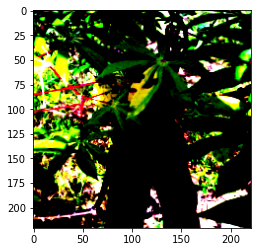

In [12]:
show_example(*train_ds[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Brown_Streak -1


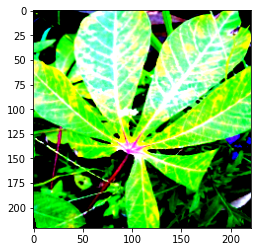

In [13]:
show_example(*train_ds[1200])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Brown_Streak -1


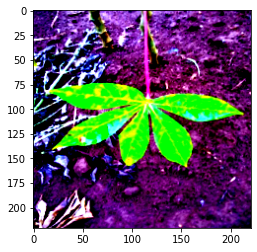

In [14]:
show_example(*train_ds[1800])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Brown_Streak -1


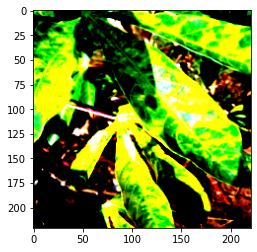

In [15]:
show_example(*train_ds[2234])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Green_Mottle -2


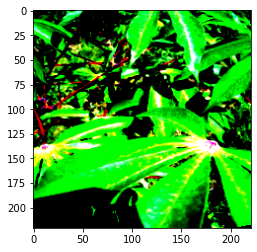

In [16]:
show_example(*train_ds[3000])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Green_Mottle -2


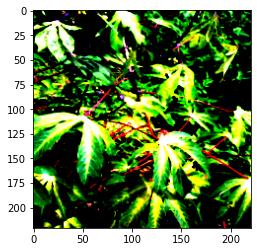

In [17]:
show_example(*train_ds[3500])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Healthy -3


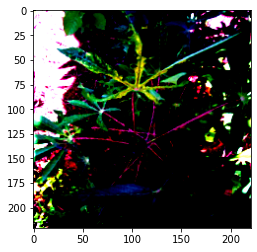

In [18]:
show_example(*train_ds[4000])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Healthy -3


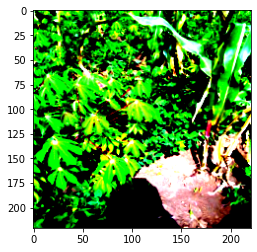

In [19]:
show_example(*train_ds[4500])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Cassava_Healthy -3


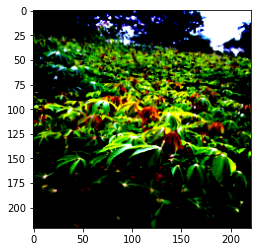

In [20]:
show_example(*train_ds[5000])

In [21]:
random_seed = 42
torch.manual_seed(random_seed)

In [22]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128

In [23]:
train_dl = DataLoader(train_ds, 
                      batch_size= batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)
val_dl = DataLoader(val_ds,
                    batch_size=batch_size,
                    num_workers=4,
                    pin_memory=True)

In [24]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# We can look at batches of images from the dataset using the **make_grid** method from torchvision.

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


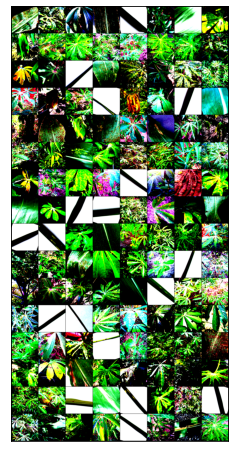

In [25]:
show_batch(train_dl)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


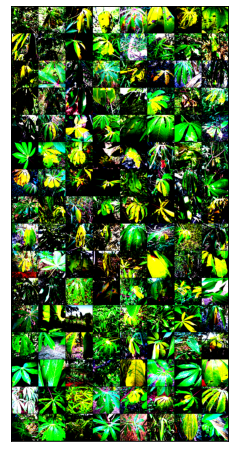

In [26]:
show_batch(val_dl)

In [28]:
model = models.mobilenet_v2(pretrained=True)
model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [29]:
from collections import OrderedDict
# Freeze pretrained model parameters to avoid backpropogating through them
for parameter in model.parameters():
    parameter.requires_grad = False

# Build custom classifier
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(1280, 512)),
                                        ('relu', nn.ReLU()),
                                        ('drop', nn.Dropout(p=0.5)),
                                        ('fc2', nn.Linear(512, len(train_ds.classes))),
                                        ('output', nn.LogSoftmax(dim=1))
                                       ]))

model.classifier = classifier

In [30]:
model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [31]:
# Function for the validation pass
def validation(model, validateloader, criterion):
    val_loss = 0
    accuracy = 0
    for images, labels in iter(validateloader):
        images, labels = images.to('cuda'), labels.to('cuda')
        output = model.forward(images)
        val_loss += criterion(output, labels).item()
        probabilities = torch.exp(output)       
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return val_loss, accuracy

In [32]:
# Loss function and gradient descent
criterion = nn.NLLLoss()#nn.CrossEntropyLoss()#
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [33]:
# Train the classifier
def train_classifier():
    epochs = 30
    steps = 0
    print_every = 120

    model.to('cuda')

    for e in range(epochs):   
        model.train()
        running_loss = 0
        for images, labels in iter(train_dl):  
            steps += 1
            images, labels = images.to('cuda'), labels.to('cuda')
    
            optimizer.zero_grad()
    
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
            if steps % print_every == 0:
            
                model.eval()
            
                # Turn off gradients for validation, saves memory and computations
                with torch.no_grad():
                    validation_loss, accuracy = validation(model, val_dl, criterion)
        
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Validation Loss: {:.3f}.. ".format(validation_loss/len(val_dl)),
                      "Validation Accuracy: {:.3f}".format(accuracy/len(val_dl)))
        
                running_loss = 0
                model.train()
                
                
train_classifier()

Epoch: 1/30..  Training Loss: 0.980..  Validation Loss: 0.706..  Validation Accuracy: 0.733
Epoch: 2/30..  Training Loss: 0.515..  Validation Loss: 0.669..  Validation Accuracy: 0.747
Epoch: 3/30..  Training Loss: 0.248..  Validation Loss: 0.667..  Validation Accuracy: 0.745
Epoch: 4/30..  Training Loss: 0.018..  Validation Loss: 0.635..  Validation Accuracy: 0.766
Epoch: 4/30..  Training Loss: 0.706..  Validation Loss: 0.651..  Validation Accuracy: 0.752
Epoch: 5/30..  Training Loss: 0.487..  Validation Loss: 0.631..  Validation Accuracy: 0.757
Epoch: 6/30..  Training Loss: 0.253..  Validation Loss: 0.645..  Validation Accuracy: 0.754
Epoch: 7/30..  Training Loss: 0.033..  Validation Loss: 0.649..  Validation Accuracy: 0.748
Epoch: 7/30..  Training Loss: 0.673..  Validation Loss: 0.652..  Validation Accuracy: 0.747
Epoch: 8/30..  Training Loss: 0.474..  Validation Loss: 0.692..  Validation Accuracy: 0.733
Epoch: 9/30..  Training Loss: 0.267..  Validation Loss: 0.679..  Validation Accu

In [34]:
torch.save(model.state_dict(), 'weights_only.pth')

In [35]:
testing_dataset = datasets.ImageFolder(test_dir, transform=transform_dict_test)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=32)

In [36]:
def test_accuracy(model, test_loader):
    # Do validation on the test set
    model.eval()
    model.to('cuda')
    with torch.no_grad():  
        accuracy = 0  
        for images, labels in iter(test_loader): 
            images, labels = images.to('cuda'), labels.to('cuda') 
            
            output = model.forward(images)
            probabilities = torch.exp(output)        
            equality = (labels.data == probabilities.max(dim=1)[1])      
            accuracy += equality.type(torch.FloatTensor).mean()      
        print("Test Accuracy: {}".format(accuracy/len(test_loader)))    
        
        
test_accuracy(model, test_loader)

Test Accuracy: 0.7734275460243225
